In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [3]:
# Setting for generating some random data
n_points = 50             # Total number of data points
label_prop = 0.5          # Proportion of points in class 1

# Initialize data matrix (as zeros)
data = np.zeros(shape=[n_points, 2])

# Set up the number of data points in each class
n_data_1 = int(n_points * label_prop)
n_data_2 = n_points - n_data_1

# Generate the data
data[0:n_data_1, 0] = np.abs(np.random.randn(n_data_1))
data[0:n_data_1, 1] = np.abs(np.random.randn(n_data_1))
data[n_data_2:, 0] = np.abs(np.random.randn(n_data_1)) + 2
data[n_data_2:, 1] = np.abs(np.random.randn(n_data_1)) + 2

# Create the labels vector
labels = np.array([0] * n_data_1 + [1] * n_data_2)

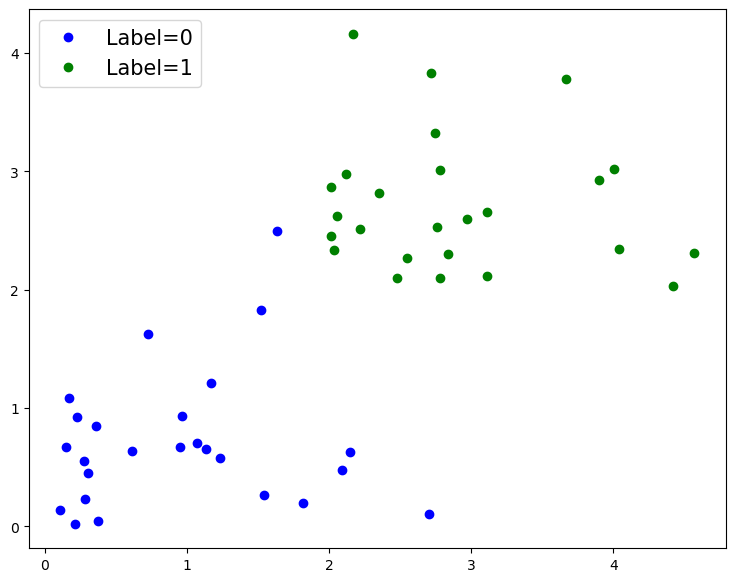

In [11]:
# Plot out labelled data
fig = plt.figure(figsize=[9, 7])
plt.plot(data[0:n_data_1, 0], data[0:n_data_1, 1],
         'b.', ms=12, label="Label=0")
plt.plot(data[n_data_2:, 0], data[n_data_2:, 1],
         'g.', ms=12, label="Label=1")
plt.legend(fontsize=15);

In [12]:
classifier = SVC(kernel='linear')

In [13]:
classifier.fit(data,labels)

SVC(kernel='linear')

In [14]:
train_predictions = classifier.predict(data)

In [15]:
print(classification_report(train_predictions,labels))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.96      0.98        26

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [19]:
new_point = np.array([[3,3]])

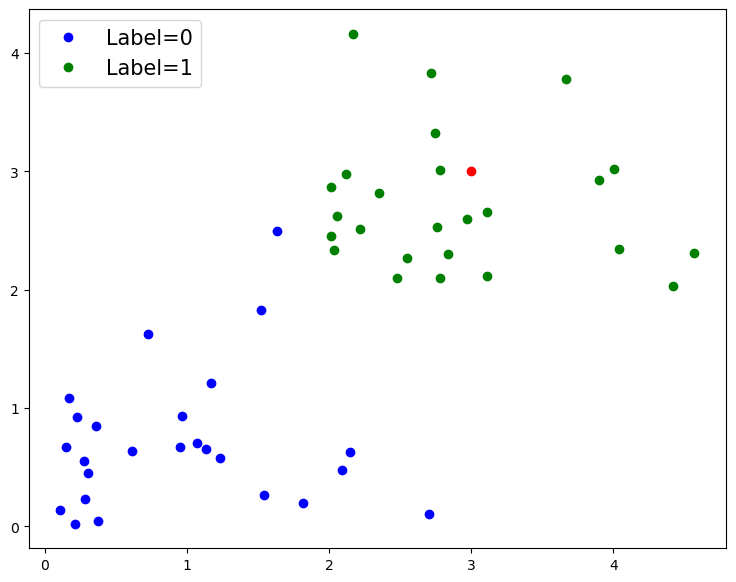

In [20]:
fig.gca().plot(new_point[0][0],new_point[0][1],'.r',ms=12);
fig

In [21]:
prediction = classifier.predict(new_point)
print('Predicted class of new data point is: {}'.format(prediction[0]))

Predicted class of new data point is: 1


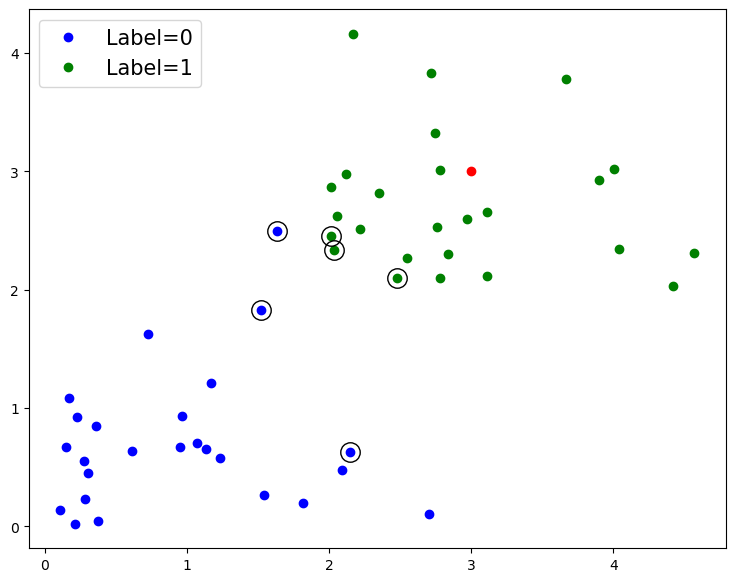

In [22]:
# Add the support vectors to plot, and redraw the figure
#  Support vectors will be indicated by being highlighted with black circles
for row in classifier.support_vectors_:
    fig.gca().plot(row[0], row[1], 'ok', ms=14,  mfc='none')
fig

In [23]:
# Grab the current plot, and find axis sizes
ax = fig.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of data to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = classifier.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--']);

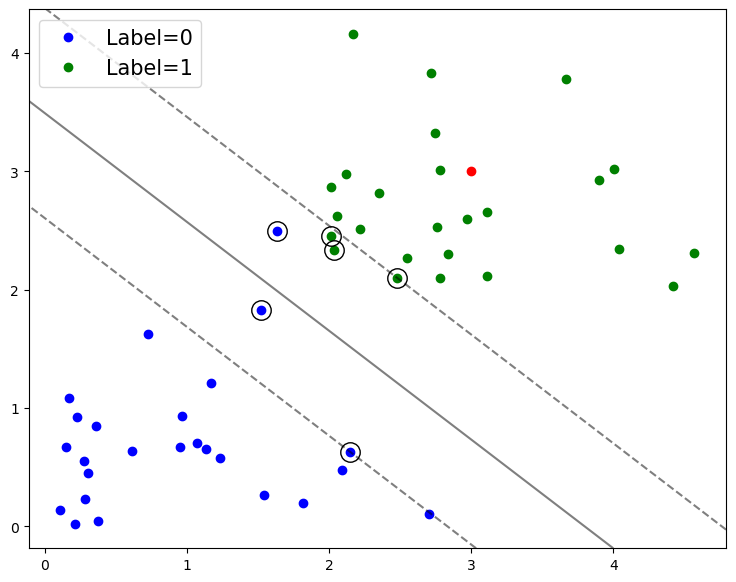

In [24]:
fig